# **Sentiment Analysis on Movie Reviews**

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
print("NLTK downloads completed")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK downloads completed


# **Step 1: Data Preparation**

In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')  # Required for newer NLTK versions
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Project for Company/AIML Engineer position at Backbencher Studio/Dataset/archive/train_data.csv')

# Initialize stopwords and lemmatizer once (for speed)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean the text
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
data['cleaned_reviews'] = data['The Reviews'].apply(clean_text)

# Split into train and test sets
X = data['cleaned_reviews']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Train size: 19361
Test size: 4841


# **Step 2: Model Training**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with TF-IDF and Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(random_state=42))])

# **Step 3: Evaluation**

Accuracy: 0.8697
Precision: 0.8581
Recall: 0.8860
F1-score: 0.8718


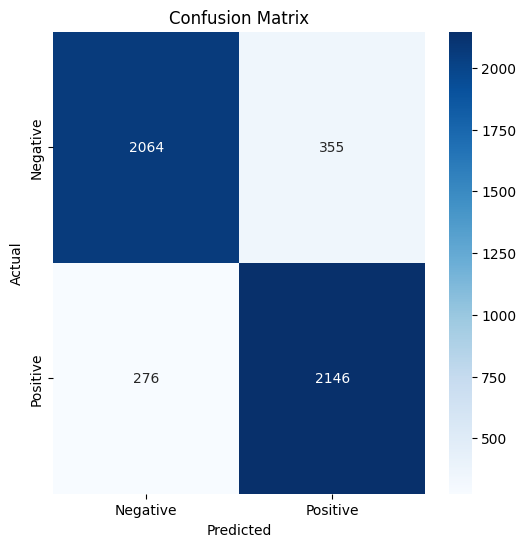

['sentiment_model.pkl']

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model
import joblib
joblib.dump(model, 'sentiment_model.pkl')

# **Step 4: Bonus - Deep Learning Model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build model
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(max_len,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_nn.fit(X_train_pad, y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data=(X_test_pad, y_test))

# Evaluate
loss, accuracy = model_nn.evaluate(X_test_pad, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


606/606 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5100 - loss: 214.5905 - val_accuracy: 0.4941 - val_loss: 0.7377
Epoch 2/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5037 - loss: 3.3279 - val_accuracy: 0.5018 - val_loss: 0.6950
Epoch 3/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5063 - loss: 1.2970 - val_accuracy: 0.4966 - val_loss: 0.6938
Epoch 4/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4967 - loss: 0.9194 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 5/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5057 - loss: 0.8042 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 6/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5076 - loss: 0.8278 - val_accuracy: 0.5007 - val_loss: 0.6931
Epoch 7/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5014 - loss: 0.7431 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 8/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4935 - loss: 0.7492 - val_accuracy: 0.5003 - va

# **Demo Script For Test Sentiment**

In [13]:
import joblib

# Load the saved model
model = joblib.load('sentiment_model.pkl')

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def predict_sentiment(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    # Make prediction
    prediction = model.predict([cleaned_text])
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    probability = model.predict_proba([cleaned_text])[0][prediction[0]]
    return sentiment, probability

# Get user input
print("Movie Review Sentiment Analyzer")
print("-------------------------------")
user_review = input("Please enter your movie review: ")

# Predict and display results
if user_review.strip():  # Check if input is not empty
    sentiment, confidence = predict_sentiment(user_review)
    print("\nAnalysis Results:")
    print(f"Sentiment: {sentiment}")
    print(f"Confidence: {confidence:.2%}")
    print("\nInterpretation:")
    if sentiment == 'Positive':
        print("This review expresses positive sentiment about the movie.")
    else:
        print("This review expresses negative sentiment about the movie.")
else:
    print("Error: Please enter a valid movie review.")

Movie Review Sentiment Analyzer
-------------------------------
Please enter your movie review: Some may go for a film like this but I most assuredly did not. A college professor, David Norwell, suddenly gets a yen for adoption. He pretty much takes the first child offered, a bad choice named Adam. As it turns out Adam doesn't have both oars in the water which, almost immediately, causes untold stress and turmoil for Dr. Norwell. This sob story drolly played out with one problem after another, all centered around Adam's inabilities and seizures. Why Norwell wanted to complicate his life with an unknown factor like an adoptive child was never explained. Along the way the good doctor managed to attract a wifey to share in all the hell the little one was dishing out. Personally, I think both of them were one beer short of a sixpack. Bypass this yawner.

Analysis Results:
Sentiment: Positive
Confidence: 60.52%

Interpretation:
This review expresses positive sentiment about the movie.
